In [6]:
# Cargo el dataset
circle <- read.csv("circle.csv",header= F)

a <- as.matrix(circle[,-3])
b <- as.matrix(circle[,3])

head(circle)

,V1,V2,V3
,<dbl>,<dbl>,<int>
1,"-0,9719350","0,846927",0
2,"-0,5529950","-0,576830",0
3,"-0,0949043","-0,298862",1
4,"-0,8095640","0,856891",0
5,"0,3990090","0,690462",0
6,"-0,6736180","-0,684443",0


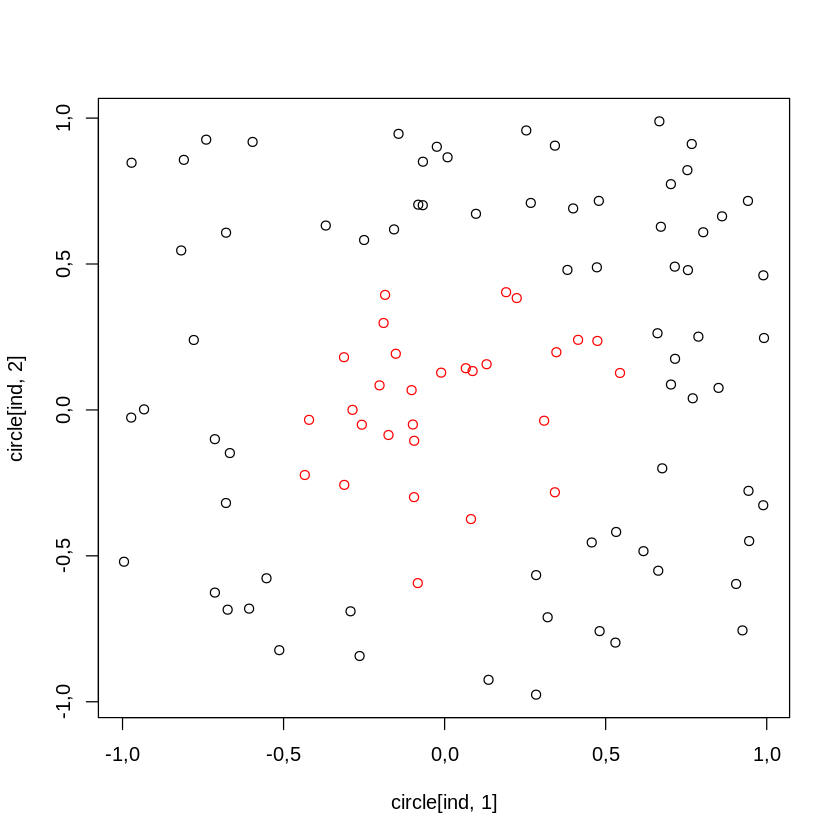

In [7]:
# Miro que pinta tiene
ind = which(circle[,3] == 0)

plot(circle[ind,1],
     circle[ind,2],
     type="p")

lines(circle[-ind,1],
      circle[-ind,2],
      type="p",
      col="red")

In [ ]:
# Defino la función de activación (la sigmoide en este caso)
activation <- function(z) {
    1/(1 + exp(-z))
}

In [319]:
# Defino aquí la función de back propagation

# h = numero de neuronas de cada capa oculta
# in = coeficiente de inercia (por defecto es 0)
backprop_mlp <- function(x, y, epochs = 10, eta = 0.1, h = c(2), inertia = 0) {
    
    # Inicializar matrices y listas
    errors <- c()
    
    # Añado el bias a los valores de entrada
    x <- cbind(x, rep(1,nrow(x)))
    
    # numero de neuronas de cada capa
    neurons <- c(ncol(x),h,ncol(y))

    # Lista de las matrices de los pesos
    Weights = list()
      
    # Numero de capas ocultas = length(h)
    n_layers = length(h)
    
    for (i in 1:(n_layers + 1)){
        # Creo la lista de matrices de los pesos, con valores generados al azar
        Weights[[i]] <- matrix(data = runif(neurons[i]*neurons[i+1], min = -1, max = 1),
            nrow = neurons[i+1], 
            ncol = neurons[i])
    }
    
    # El Wdelta de la epoca anterior (para computar el termino de inercia) 
    Wdelta_old <- list()
    for (i in 1:(n_layers + 1)){
        Wdelta_old[[i]] <- 0
    }
        
    for (j in 1:epochs) {
        
        # Defino las variables que necesito, propagando hacía adelante
        
        # Valores de las neuronas de las capas ocultas
        # h = f(B) = f(W*x)
        h = list()

        # aux = f(B)(1 - f(B)) 
        aux = list()
        
        # Trato los primeros elementos de las lista de manera distinta (h[[1]] quiere x, no h)
        # aux[[1]] no necesita tratamiento especial, pero así meto todo en un solo bucle for
        h[[1]] <- x #activation(x %*% t(Weights[[1]]))
        #aux[[1]] <- h[[1]] * (1 - h[[1]])
        for (i in 1:(n_layers + 1)){
            h[[i+1]] <- activation(h[[i]] %*% t(Weights[[i]]))
            aux[[i]] <- activation(h[[i]] %*% t(Weights[[i]])) * (1 - activation(h[[i]] %*% t(Weights[[i]])))
        }

        # Lista de los Wdelta
        Wdelta = list()
        
        y_out = h[[n_layers + 2]]
        
        # error = (b - b^)
        error <- y - y_out
             
        # Lista de soporte para poder iterar sobre los deltaW
        supp <- list()
        supp[[n_layers + 1]] <- error * aux[[n_layers + 1]]        
        
        # Calculo los DeltaW
        # Para los pesos de capa oculta a salida: DeltaWeights_2 = - eta * (aux*h_1)
        
        # Back propagation: el bucle for va al revés
        for (i in (n_layers + 1):1){
            Wdelta[[i]]  <- t(supp[[i]]) %*% h[[i]]
            Weights[[i]] <- Weights[[i]] + (eta * Wdelta[[i]]) + (inertia * Wdelta_old[[i]])
            if (i > 1){
                supp[[i - 1]] <- (supp[[i]] %*% Weights[[i]]) * aux[[i - 1]]
            }
        }
        # Error output
        errors <- c(errors, sum(error**2))
        
        # Guardo los Wdelta por si quiero usar un termino de inercia en la próxima epoca
        Wdelta_old = Wdelta
    }
    
# Return values
plot(errors)  

# Weights = list(Weights_1, Weights_2)    
return(Weights)
}

[[1]]
            V1        V2           
[1,]  2,538805  9,932908 -4,5051986
[2,] -3,254114  4,004540 -2,3119114
[3,]  6,958156  4,180391  3,9740375
[4,]  7,711597 -4,471987 -4,0275518
[5,] -1,077645 -2,324709 -0,6915864

[[2]]
          [,1]     [,2]     [,3]      [,4]      [,5]
[1,] -12,03336 -5,22843 9,545385 -12,58701 -4,670083

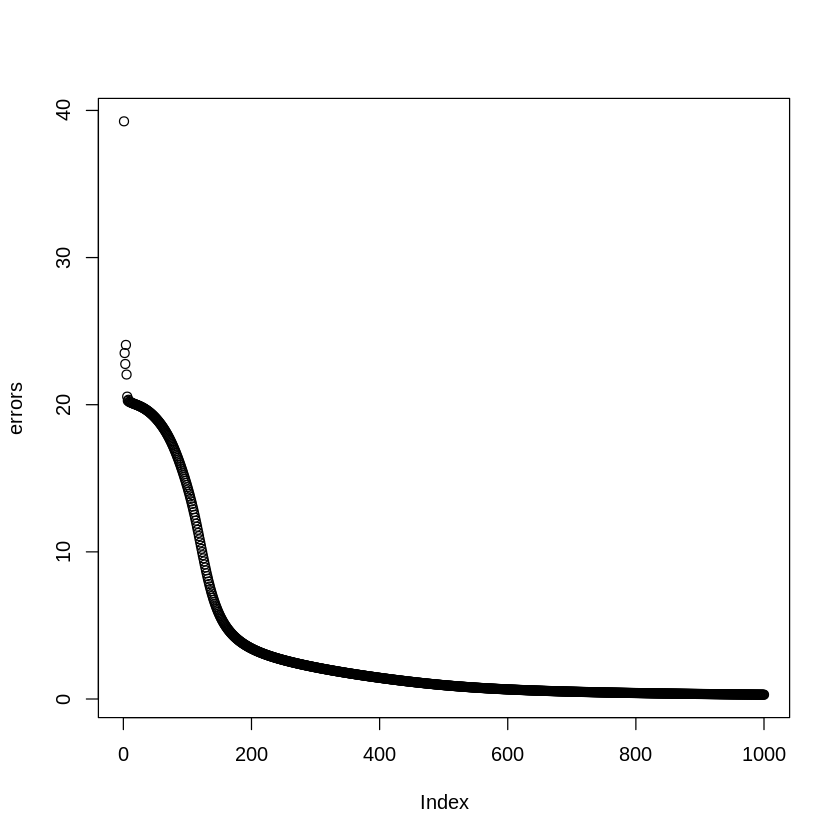

In [323]:
set.seed(1)

my_mlp <- backprop_mlp(a, b, h = c(5), epochs= 1000, eta = 0.1, inertia = 0.1) 
my_mlp

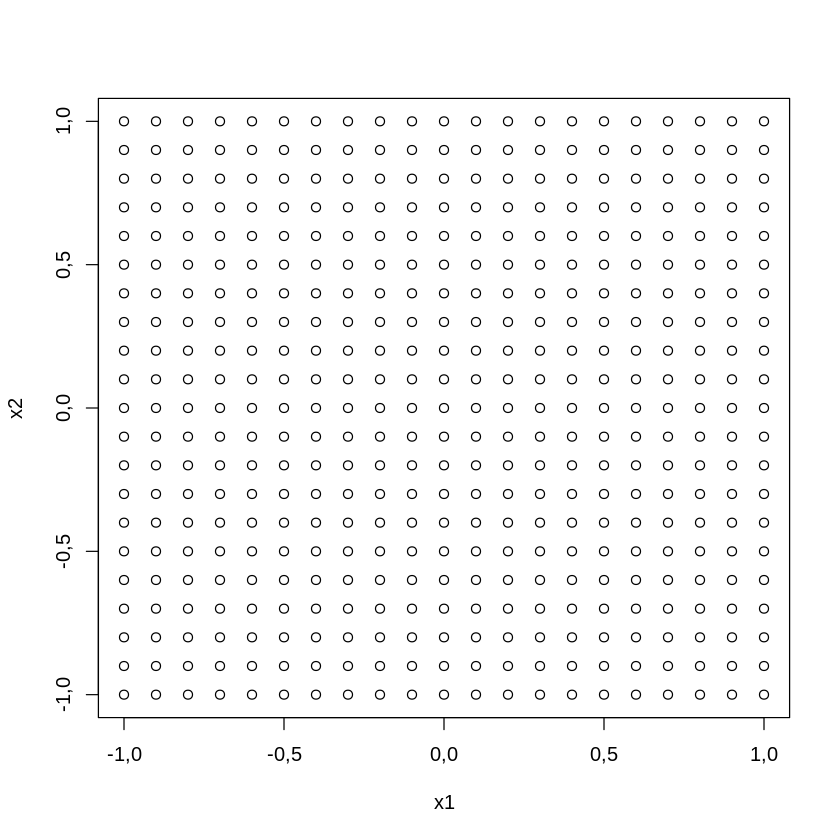

In [316]:
# Quiero evaluar como mi red separa los puntos

# Construcción de la rejilla
x1 <- seq(from = -1, to = 1, by = 0.1)
n <- length(x1)
x1 <- rep(x1,n)
m <- 0
x2 <- vector("numeric", length(x1))
for (i in 1:n) {
  m <- (i-1)*n + 1
  x2[m:(i*n)] <- rep(x1[i],n)
}
plot(x1,x2)

In [406]:
# Ahora creo una función que use los pesos de la red neuronal para evaluar los puntos

eval_mlp <- function(x, weights) {

    # Recreo la estructura de la red neuronal    
    # Añado el bias a los valores de entrada
    x <- cbind(x, rep(1,nrow(x)))
        
    for (layer in weights){
        x <- activation(t(layer %*% t(x)))
    }   
    return(x)
}

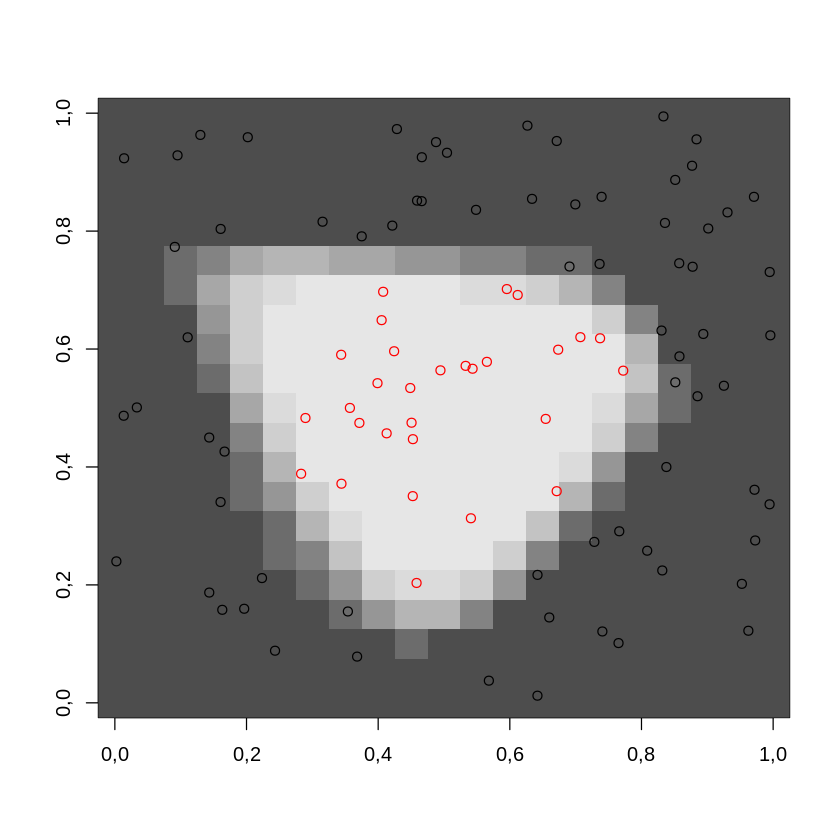

In [407]:
# Ahora evaluo los puntos de la rejilla

a_rej = cbind(x1,x2)
b_rej = eval_mlp(a_rej, my_mlp)

# Ahora imprimo los limites de la red
image(matrix(b_rej, nrow = n, ncol = n), 
      zlim = c(0,1), 
      col = gray.colors(10))

# Y encima los puntos del dataset
# (hay que ajustar los ejes porque image pinta solo de 0 a 1,
# mientras que el dataset va de -1 a 1)
lines(circle[-ind,1]/2 + 0.5,
      circle[-ind,2]/2 + 0.5,
      type="p",
      col="red")

lines(circle[ind,1]/2 + 0.5,
      circle[ind,2]/2 + 0.5,
      type="p",
      col="black")